# 16_ShootLengthGrowth_Vis
In diesem Jupyter Notebook werden das Wachstum gemessen an den Messstreifen in einer Visualisierung dargestellt.

*Der folgende Code wurde mithilfe von ChatGPT (OpenAI) erstellt und bearbeitet.*

### 1. Visualisierung des Wachstums der Linde (Daten der Messstreifen FHNW)

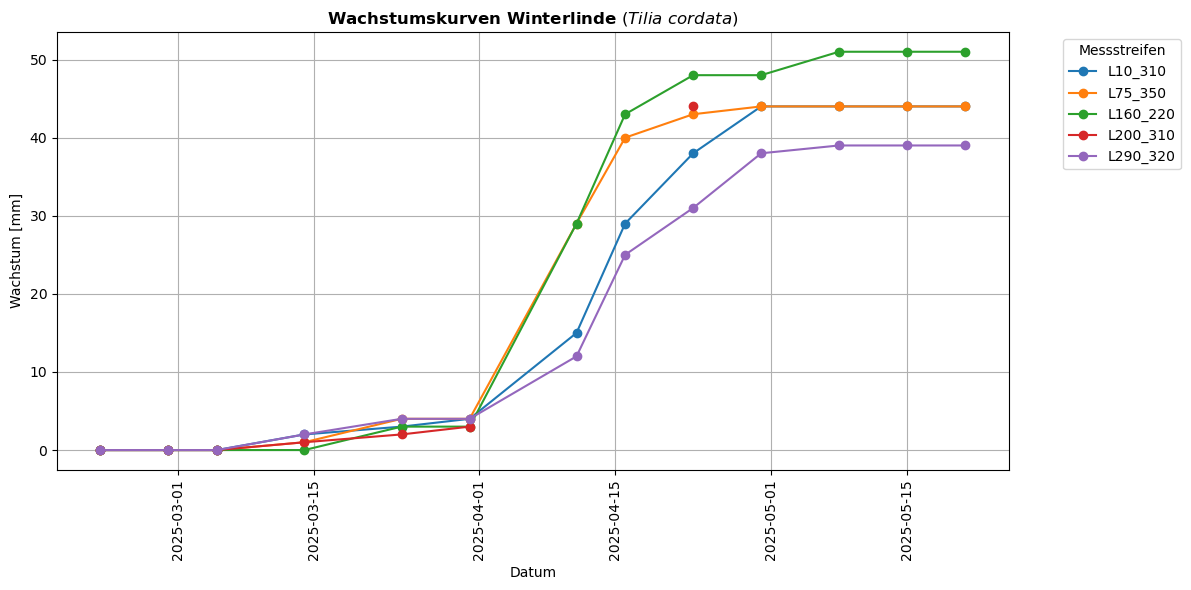

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Deine Daten als String (für Beispielzwecke)
data = ".\\160_BaseData\\data_linde_messsstreifen.csv"
title = r"$\bf{Wachstumskurven\ Winterlinde}$ ($\it{Tilia\ cordata}$)"

# In DataFrame laden
df = pd.read_csv(data, na_values=["#NV"])

# Doppelte Spaltennamen mit Suffix versehen
def make_unique(columns):
    seen = {}
    new_cols = []
    for col in columns:
        if col in seen:
            seen[col] += 1
            new_cols.append(f"{col}_{seen[col]}")
        else:
            seen[col] = 0
            new_cols.append(col)
    return new_cols

df.columns = make_unique(df.columns)

# Datumsspalten umbenennen und in datetime umwandeln
df.columns = [df.columns[0]] + [pd.to_datetime(c.split('_')[0], format="%d-%m-%Y") for c in df.columns[1:]]

# Transponieren für Zeitachse
df.set_index('ID_Messstreifen', inplace=True)
df = df.T

# Plotten
plt.figure(figsize=(12, 6))
for column in df.columns:
    plt.plot(df.index, df[column], marker='o', label=column)

plt.title(title)
plt.xlabel("Datum")
plt.ylabel("Wachstum [mm]")
plt.xticks(rotation=90)
plt.legend(title="Messstreifen", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


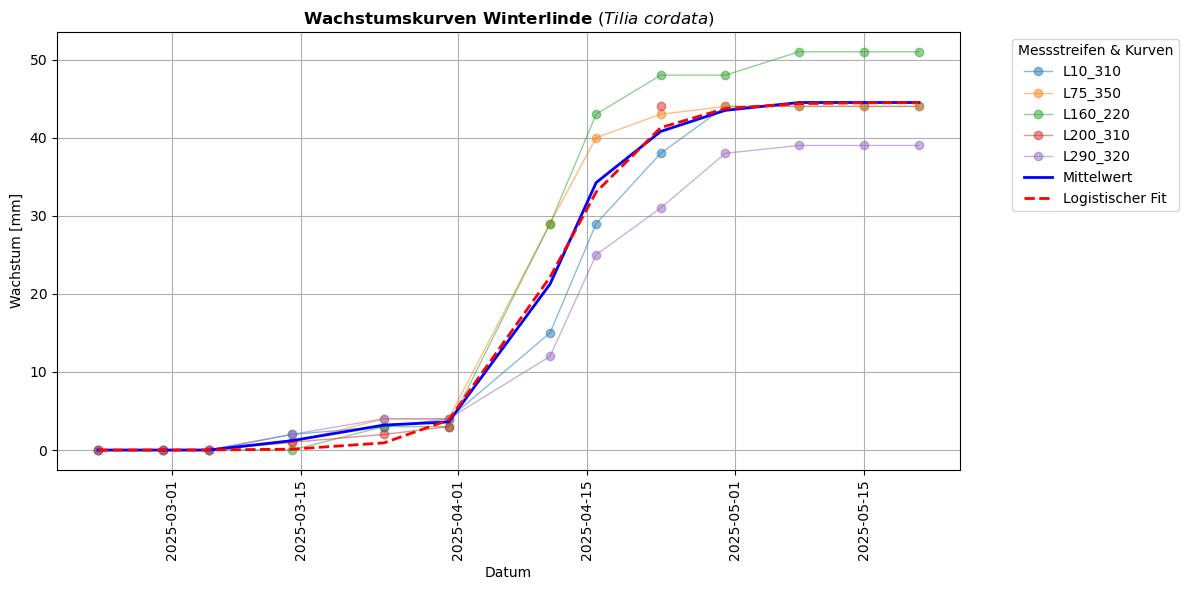

Logistischer Fit:
  K  = 44.49
  r  = 0.2138
  t0 = 49.04 (Tage seit 2025-02-21)


In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# CSV-Datei laden
data = ".\\160_BaseData\\data_linde_messsstreifen.csv"
title = r"$\bf{Wachstumskurven\ Winterlinde}$ ($\it{Tilia\ cordata}$)"
df = pd.read_csv(data, na_values=["#NV"])

# Doppelte Spaltennamen mit Suffix versehen
def make_unique(columns):
    seen = {}
    new_cols = []
    for col in columns:
        if col in seen:
            seen[col] += 1
            new_cols.append(f"{col}_{seen[col]}")
        else:
            seen[col] = 0
            new_cols.append(col)
    return new_cols

df.columns = make_unique(df.columns)

# Datumsspalten umbenennen und in datetime umwandeln
df.columns = [df.columns[0]] + [pd.to_datetime(c.split('_')[0], format="%d-%m-%Y") for c in df.columns[1:]]


# Transponieren für Zeitachse
df.set_index('ID_Messstreifen', inplace=True)
df = df.T

# 🔧 Fix: Index als datetime interpretieren
df.index = pd.to_datetime(df.index, format="%d-%m-%Y")

# Mittelwert berechnen
mean_growth = df.mean(axis=1)

# Zeit in Tagen für logistischen Fit
t = (df.index - df.index[0]).days.values
y = mean_growth.values
valid = ~np.isnan(y)
t_valid = t[valid]
y_valid = y[valid]

# Logistische Funktion definieren
def logistic(t, K, r, t0):
    return K / (1 + np.exp(-r * (t - t0)))

# Fit anwenden
initial_guess = [max(y_valid), 0.1, np.median(t_valid)]
params, _ = curve_fit(logistic, t_valid, y_valid, p0=initial_guess, maxfev=10000)

# Angepasste Kurve berechnen
fitted_curve = logistic(t, *params)

# Plotten
plt.figure(figsize=(12, 6))

# Einzelne Kurven
for column in df.columns:
    plt.plot(df.index, df[column], marker='o', linewidth=1, alpha=0.5, label=column)

# Mittelwertkurve
plt.plot(df.index, mean_growth, color='blue', linewidth=2, label='Mittelwert')

# Logistische Fit-Kurve
plt.plot(df.index, fitted_curve, color='red', linestyle='--', linewidth=2, label='Logistischer Fit')

# Formatierung
plt.title(title)
plt.xlabel("Datum")
plt.ylabel("Wachstum [mm]")
plt.xticks(rotation=90)
plt.legend(title="Messstreifen & Kurven", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Fit-Parameter anzeigen
print(f"Logistischer Fit:\n  K  = {params[0]:.2f}\n  r  = {params[1]:.4f}\n  t0 = {params[2]:.2f} (Tage seit {df.index[0].date()})")


### 2. Visualisierung des Wachstums der Ahorn (Daten der Messstreifen FHNW)

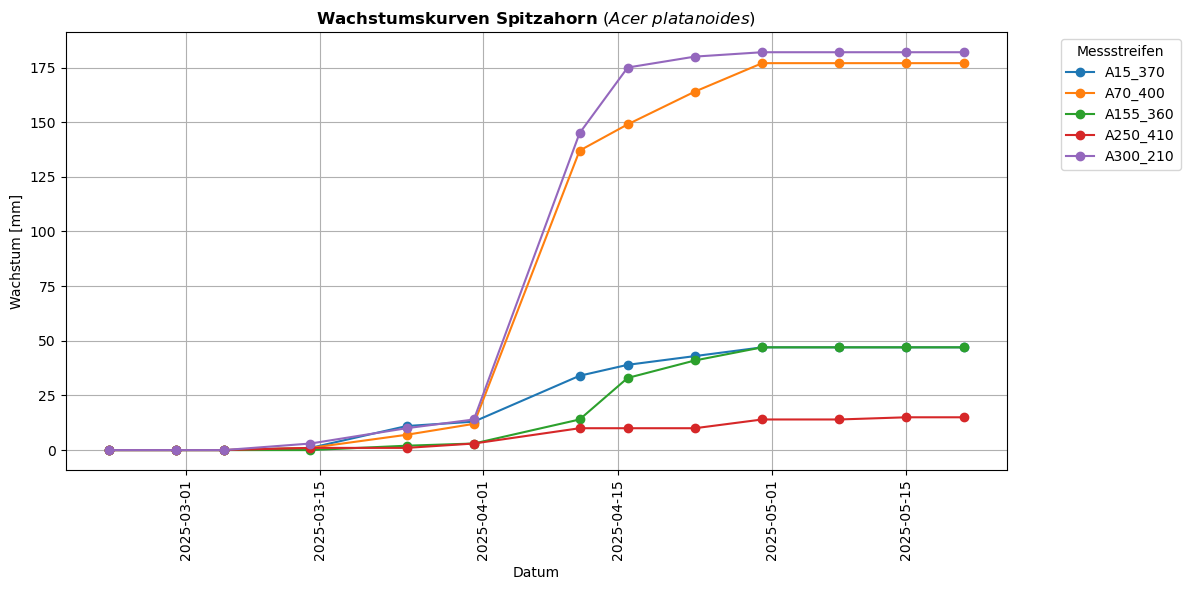

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Deine Daten als String (für Beispielzwecke)
data = ".\\160_BaseData\\data_ahorn_messsstreifen.csv"
title = r"$\bf{Wachstumskurven\ Spitzahorn}$ ($\it{Acer\ platanoides}$)"

# In DataFrame laden
df = pd.read_csv(data, na_values=["#NV"])

# Doppelte Spaltennamen mit Suffix versehen
def make_unique(columns):
    seen = {}
    new_cols = []
    for col in columns:
        if col in seen:
            seen[col] += 1
            new_cols.append(f"{col}_{seen[col]}")
        else:
            seen[col] = 0
            new_cols.append(col)
    return new_cols

df.columns = make_unique(df.columns)

# Datumsspalten umbenennen und in datetime umwandeln
df.columns = [df.columns[0]] + [pd.to_datetime(c.split('_')[0], format="%d-%m-%Y") for c in df.columns[1:]]

# Transponieren für Zeitachse
df.set_index('ID_Messstreifen', inplace=True)
df = df.T

# Plotten
plt.figure(figsize=(12, 6))
for column in df.columns:
    plt.plot(df.index, df[column], marker='o', label=column)

plt.title(title)
plt.xlabel("Datum")
plt.ylabel("Wachstum [mm]")
plt.xticks(rotation=90)
plt.legend(title="Messstreifen", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


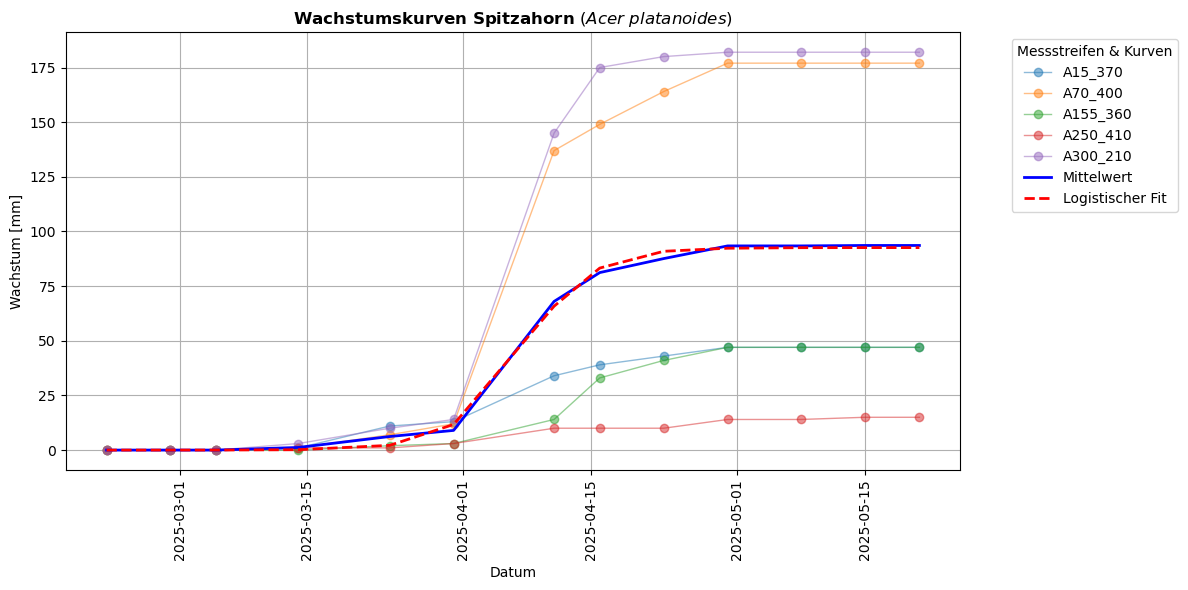

Logistischer Fit:
  K  = 92.62
  r  = 0.2574
  t0 = 45.51 (Tage seit 2025-02-21)


In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# CSV-Datei laden
data = ".\\160_BaseData\\data_ahorn_messsstreifen.csv"
title = r"$\bf{Wachstumskurven\ Spitzahorn}$ ($\it{Acer\ platanoides}$)"
df = pd.read_csv(data, na_values=["#NV"])

# Doppelte Spaltennamen mit Suffix versehen
def make_unique(columns):
    seen = {}
    new_cols = []
    for col in columns:
        if col in seen:
            seen[col] += 1
            new_cols.append(f"{col}_{seen[col]}")
        else:
            seen[col] = 0
            new_cols.append(col)
    return new_cols

df.columns = make_unique(df.columns)

# Datumsspalten umbenennen und in datetime umwandeln
df.columns = [df.columns[0]] + [pd.to_datetime(c.split('_')[0], format="%d-%m-%Y") for c in df.columns[1:]]


# Transponieren für Zeitachse
df.set_index('ID_Messstreifen', inplace=True)
df = df.T

# 🔧 Fix: Index als datetime interpretieren
df.index = pd.to_datetime(df.index, format="%d-%m-%Y")

# Mittelwert berechnen
mean_growth = df.mean(axis=1)

# Zeit in Tagen für logistischen Fit
t = (df.index - df.index[0]).days.values
y = mean_growth.values
valid = ~np.isnan(y)
t_valid = t[valid]
y_valid = y[valid]

# Logistische Funktion definieren
def logistic(t, K, r, t0):
    return K / (1 + np.exp(-r * (t - t0)))

# Fit anwenden
initial_guess = [max(y_valid), 0.1, np.median(t_valid)]
params, _ = curve_fit(logistic, t_valid, y_valid, p0=initial_guess, maxfev=10000)

# Angepasste Kurve berechnen
fitted_curve = logistic(t, *params)

# Plotten
plt.figure(figsize=(12, 6))

# Einzelne Kurven
for column in df.columns:
    plt.plot(df.index, df[column], marker='o', linewidth=1, alpha=0.5, label=column)

# Mittelwertkurve
plt.plot(df.index, mean_growth, color='blue', linewidth=2, label='Mittelwert')

# Logistische Fit-Kurve
plt.plot(df.index, fitted_curve, color='red', linestyle='--', linewidth=2, label='Logistischer Fit')

# Formatierung
plt.title(title)
plt.xlabel("Datum")
plt.ylabel("Wachstum [mm]")
plt.xticks(rotation=90)
plt.legend(title="Messstreifen & Kurven", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Fit-Parameter anzeigen
print(f"Logistischer Fit:\n  K  = {params[0]:.2f}\n  r  = {params[1]:.4f}\n  t0 = {params[2]:.2f} (Tage seit {df.index[0].date()})")


### 3. Visualisierung des Wachstums der Kirsche (Daten der Messstreifen FHNW)

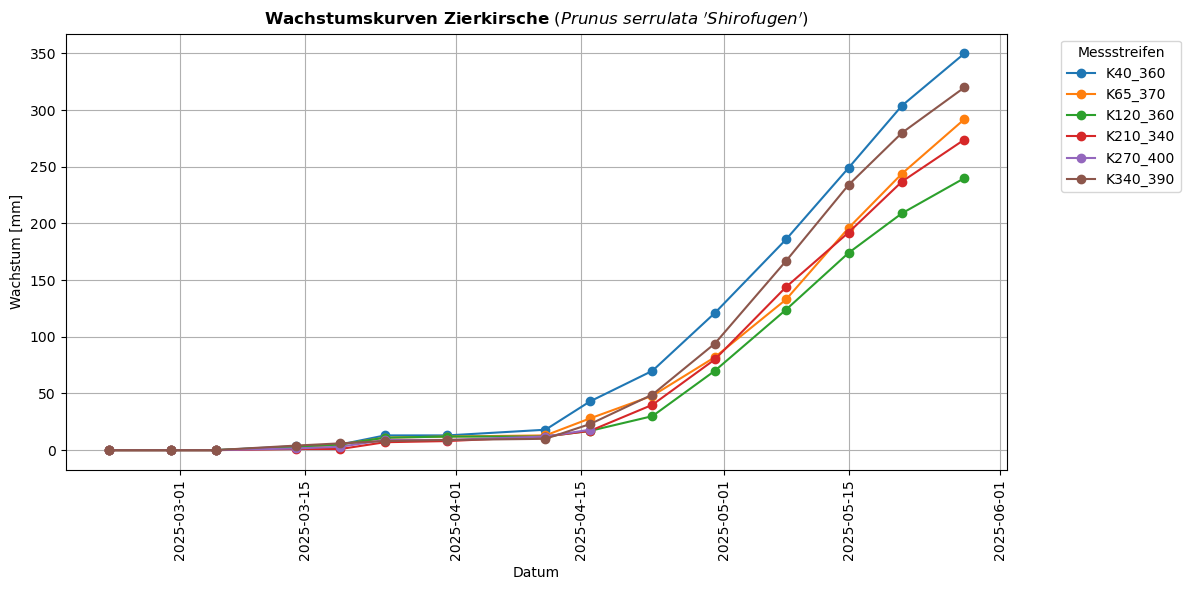

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Deine Daten als String (für Beispielzwecke)
data = ".\\160_BaseData\\data_kirsche_messsstreifen.csv"
title = r"$\bf{Wachstumskurven\ Zierkirsche}$ ($\it{Prunus\ serrulata\ 'Shirofugen'}$)"

# In DataFrame laden
df = pd.read_csv(data, na_values=["#NV"])

# Doppelte Spaltennamen mit Suffix versehen
def make_unique(columns):
    seen = {}
    new_cols = []
    for col in columns:
        if col in seen:
            seen[col] += 1
            new_cols.append(f"{col}_{seen[col]}")
        else:
            seen[col] = 0
            new_cols.append(col)
    return new_cols

df.columns = make_unique(df.columns)

# Datumsspalten umbenennen und in datetime umwandeln
df.columns = [df.columns[0]] + [pd.to_datetime(c.split('_')[0], format="%d-%m-%Y") for c in df.columns[1:]]

# Transponieren für Zeitachse
df.set_index('ID_Messstreifen', inplace=True)
df = df.T

# Plotten
plt.figure(figsize=(12, 6))
for column in df.columns:
    plt.plot(df.index, df[column], marker='o', label=column)

plt.title(title)
plt.xlabel("Datum")
plt.ylabel("Wachstum [mm]")
plt.xticks(rotation=90)
plt.legend(title="Messstreifen", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


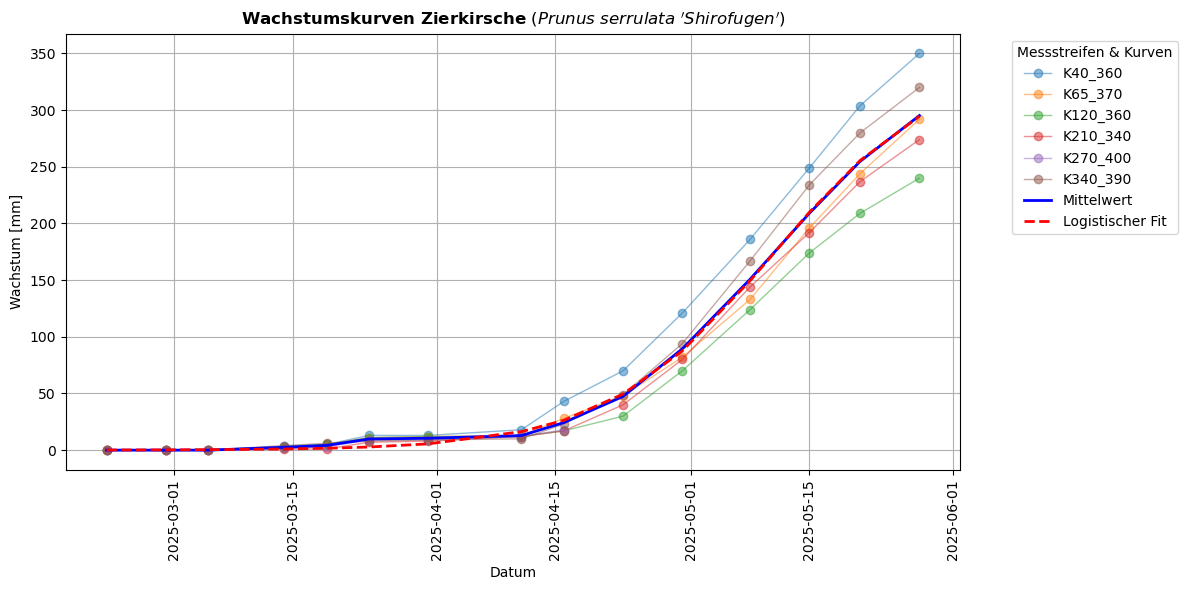

Logistischer Fit:
  K  = 345.75
  r  = 0.1011
  t0 = 78.70 (Tage seit 2025-02-21)


In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# CSV-Datei laden
data = ".\\160_BaseData\\data_kirsche_messsstreifen.csv"
title = r"$\bf{Wachstumskurven\ Zierkirsche}$ ($\it{Prunus\ serrulata\ 'Shirofugen'}$)"
df = pd.read_csv(data, na_values=["#NV"])

# Doppelte Spaltennamen mit Suffix versehen
def make_unique(columns):
    seen = {}
    new_cols = []
    for col in columns:
        if col in seen:
            seen[col] += 1
            new_cols.append(f"{col}_{seen[col]}")
        else:
            seen[col] = 0
            new_cols.append(col)
    return new_cols

df.columns = make_unique(df.columns)

# Datumsspalten umbenennen und in datetime umwandeln
df.columns = [df.columns[0]] + [pd.to_datetime(c.split('_')[0], format="%d-%m-%Y") for c in df.columns[1:]]


# Transponieren für Zeitachse
df.set_index('ID_Messstreifen', inplace=True)
df = df.T

# 🔧 Fix: Index als datetime interpretieren
df.index = pd.to_datetime(df.index, format="%d-%m-%Y")

# Mittelwert berechnen
mean_growth = df.mean(axis=1)

# Zeit in Tagen für logistischen Fit
t = (df.index - df.index[0]).days.values
y = mean_growth.values
valid = ~np.isnan(y)
t_valid = t[valid]
y_valid = y[valid]

# Logistische Funktion definieren
def logistic(t, K, r, t0):
    return K / (1 + np.exp(-r * (t - t0)))

# Fit anwenden
initial_guess = [max(y_valid), 0.1, np.median(t_valid)]
params, _ = curve_fit(logistic, t_valid, y_valid, p0=initial_guess, maxfev=10000)

# Angepasste Kurve berechnen
fitted_curve = logistic(t, *params)

# Plotten
plt.figure(figsize=(12, 6))

# Einzelne Kurven
for column in df.columns:
    plt.plot(df.index, df[column], marker='o', linewidth=1, alpha=0.5, label=column)

# Mittelwertkurve
plt.plot(df.index, mean_growth, color='blue', linewidth=2, label='Mittelwert')

# Logistische Fit-Kurve
plt.plot(df.index, fitted_curve, color='red', linestyle='--', linewidth=2, label='Logistischer Fit')

# Formatierung
plt.title(title)
plt.xlabel("Datum")
plt.ylabel("Wachstum [mm]")
plt.xticks(rotation=90)
plt.legend(title="Messstreifen & Kurven", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Fit-Parameter anzeigen
print(f"Logistischer Fit:\n  K  = {params[0]:.2f}\n  r  = {params[1]:.4f}\n  t0 = {params[2]:.2f} (Tage seit {df.index[0].date()})")
